Please refer to this assignment’s synthetic dataset. This dataset is composed of two features belonging to observations that can be grouped into certain species. The goal is to refine the data so that we can classify species together and use their features to classify new observations. 

1. [10 pts] Plot the data with a scatterplot. How many species must be there in the dataset? (For the rest of this assignment, use that number as the number-of-clusters parameter in methods such as KMeans) 

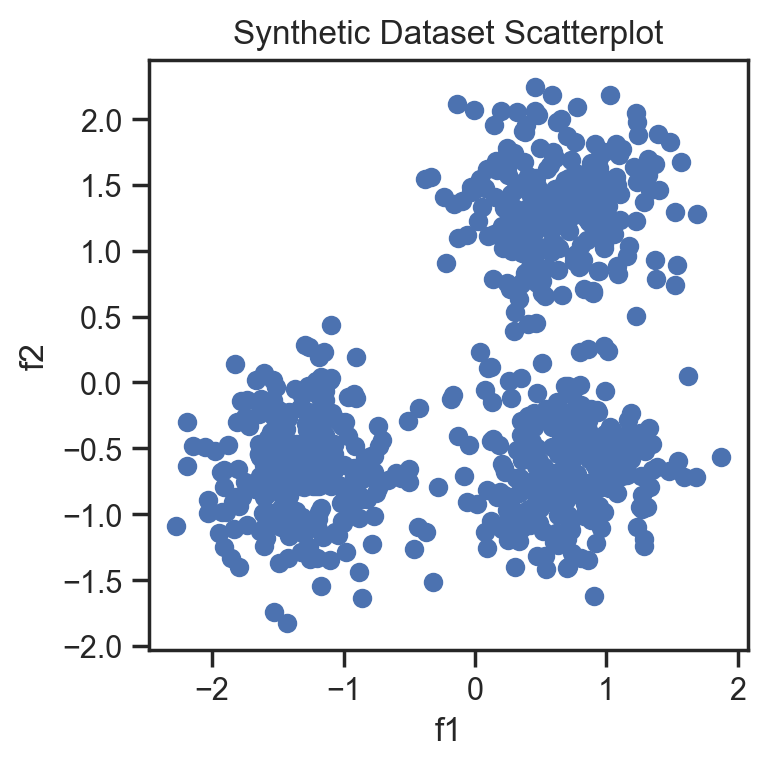

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import seaborn as sns; 
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 200
plt.rcParams["figure.figsize"] = (8,6)
sns.set(style="ticks", color_codes=True) 
np.random.seed(0)

df = pd.read_csv("clustering_synthetic_dataset.csv")
X = df.values
fig, ax = plt.subplots(figsize=(4,4), dpi=200)
ax.scatter(*X.T)
ax.set_title("Synthetic Dataset Scatterplot")
ax.set_xlabel("f1")
ax.set_ylabel("f2")    
plt.tight_layout()

There are 3 obvious clusters emergent in the dataset. 

2. [10 pts] Find the rough feature ranges to classify these species correctly. It might be a good idea to do this step visually from some data plots. (An example statement, "Species 1 has feature A in the range of [0-1.5]") 

In the next set of problems, we will clean the points that are around the boundaries of the cluster. (These points might be due to errors, anomalies, or simply be outliers.) This step is done to refine feature boundaries so that a scientist can classify the species manually, reliably, and with a high-level generalization. 

Species 1: 
* f1 in the range of [-2.0, 0.0]
* f2 in the range of [-2.0, 0.0]

Species 2: 
* f1 in the range of [ 0.0, 2.0]
* f2 in the range of [-2.0, 0.0]

Species 3: 
* f1 in the range of [ 0.0, 2.0]
* f2 in the range of [ 0.0, 2.0]

3. [20 pts] Use K-means clustering to find anomalies. (Hint: find cluster data points that are far from the centroids.) 

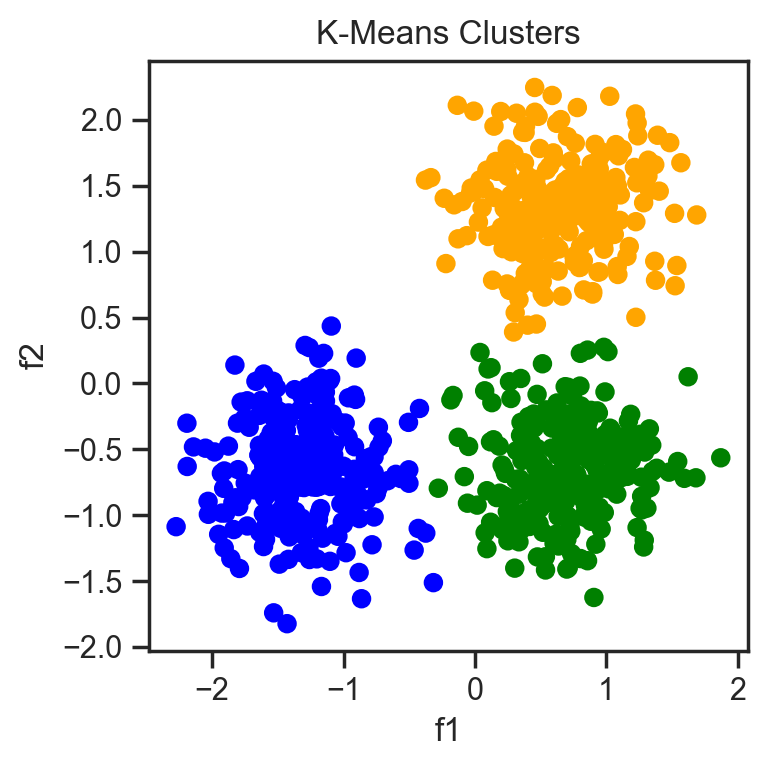

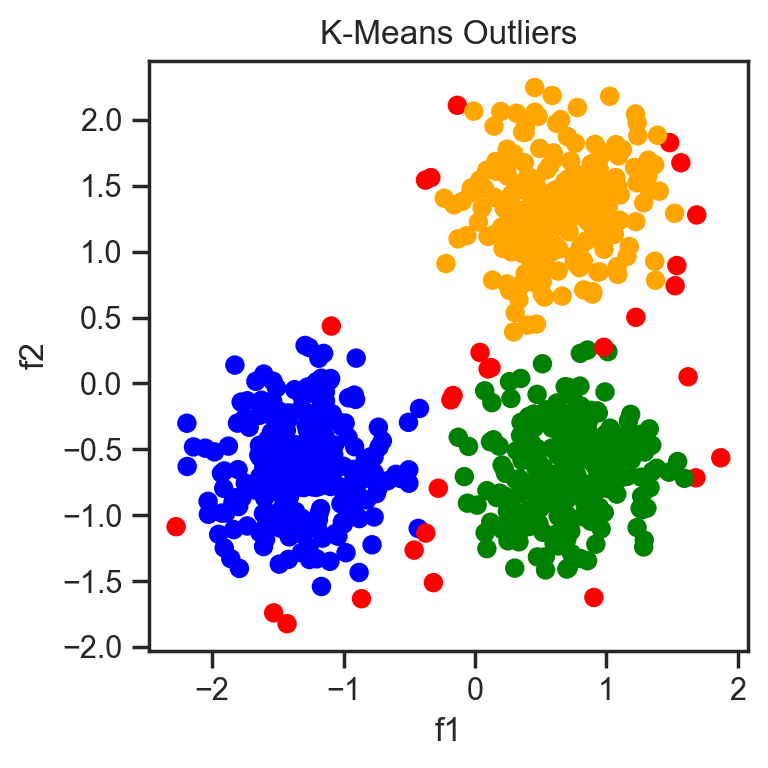

In [2]:
## CLUSTER
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
colors = list(map(lambda x: ["blue", "orange", "green"][x], y_kmeans))

## PLOT CLUSTERS
fig, ax = plt.subplots(figsize=(4,4), dpi=200)
ax.scatter(*X.T, c=colors)
ax.set_title("K-Means Clusters")
ax.set_xlabel("f1")
ax.set_ylabel("f2")    
plt.tight_layout()

## IDENTIFY OUTLIERS
centroids = kmeans.cluster_centers_
clusters_idxs = [np.where(y_kmeans == i)[0] for i in range(3)]
dists = np.linalg.norm(X - centroids[y_kmeans], axis=-1)
std = [np.std(dists[i]) for i in clusters_idxs]
thresholds = 4 * np.array(std)
outliers = np.where(dists > thresholds[y_kmeans])

## PLOT OUTLIERS
outlier_y_kmeans = y_kmeans.copy()
outlier_y_kmeans[outliers] = 3
outlier_colors = list(map(lambda x: ["blue", "orange", "green", "red"][x], outlier_y_kmeans))
fig, ax = plt.subplots(figsize=(4,4), dpi=200)
ax.scatter(*X.T, c=outlier_colors, )
ax.set_title("K-Means Outliers")
ax.set_xlabel("f1")
ax.set_ylabel("f2")    
plt.tight_layout()

4. [20 pts] Use DBSCAN clustering to find anomalies. To be clear, look for anomalies with DBSCAN in the full dataset; this is an alternative to Q3.’s method. 

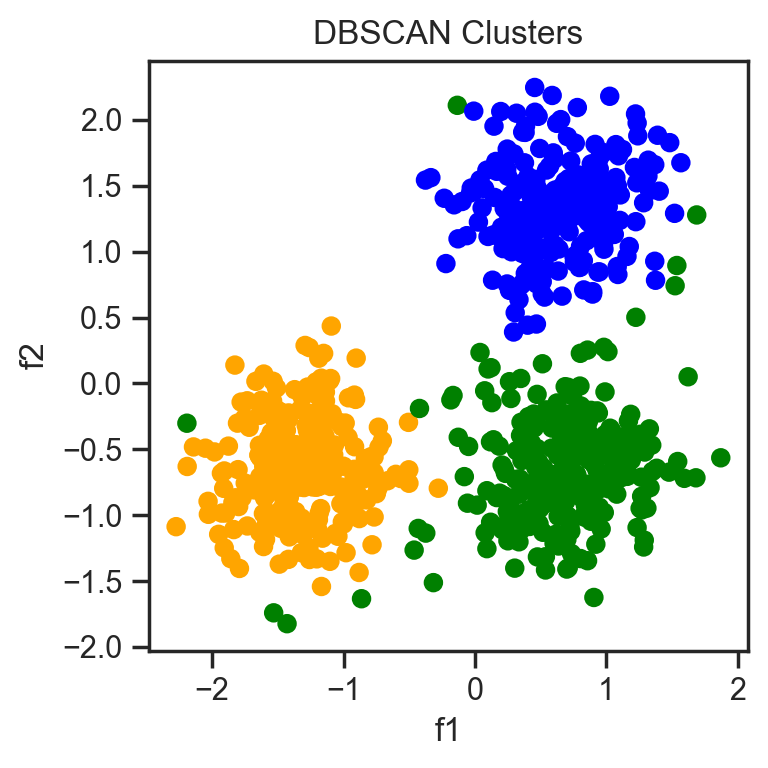

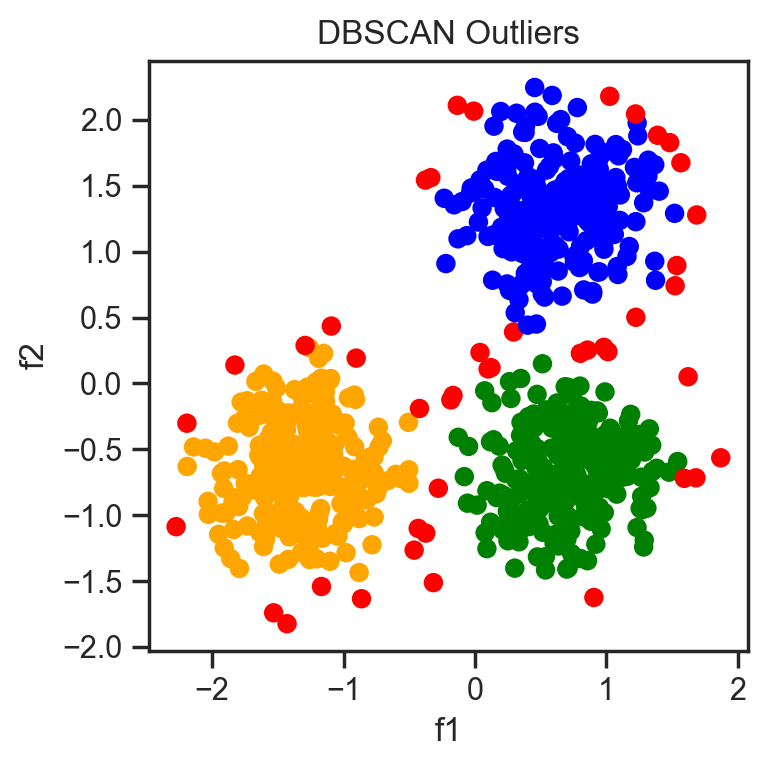

In [3]:
## CLUSTER
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
y_dbscan = dbscan.fit_predict(X)
colors = list(map(lambda x: ["blue", "orange", "green"][x], y_dbscan))

## PLOT CLUSTERS
fig, ax = plt.subplots(figsize=(4,4), dpi=200)
ax.scatter(*X.T, c=colors)
ax.set_title("DBSCAN Clusters")
ax.set_xlabel("f1")
ax.set_ylabel("f2")    
plt.tight_layout()

## IDENTIFY OUTLIERS
clusters_idxs = [np.where(y_dbscan == i)[0] for i in range(3)]
centroids = np.array([np.mean(X[i], axis=0) for i in clusters_idxs])
dists = np.linalg.norm(X - centroids[y_dbscan], axis=-1)
std = [np.std(dists[i]) for i in clusters_idxs]
thresholds = 4 * np.array(std)
outliers = np.where(dists > thresholds[y_dbscan])

## PLOT OUTLIERS
outlier_y_dbscan = y_dbscan.copy()
outlier_y_dbscan[outliers] = 3
outlier_colors = list(map(lambda x: ["blue", "orange", "green", "red"][x], outlier_y_dbscan))
fig, ax = plt.subplots(figsize=(4,4), dpi=200)
ax.scatter(*X.T, c=outlier_colors)
ax.set_title("DBSCAN Outliers")
ax.set_xlabel("f1")
ax.set_ylabel("f2")    
plt.tight_layout()

5. [30 pts] Now, choose either the K-means results from Q3. or the DBSCAN results from Q4., remove the points that the chosen method deemed anomalous, and train a decision tree from the remaining data to classify the species. (You do not need to justify the choice; they should both be reasonable options.) Visualize the model decision tree (but not just by plotting lines on a scatterplot of the data). Hint: the result should look like Module 6’s Jupyter Notebook’s cell [4]. 

ACC: 100.00%


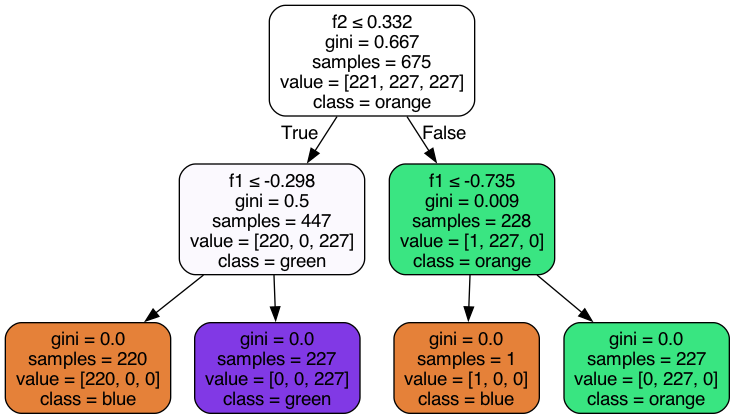

In [4]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from IPython.display import Image
import os

X_train, X_test, y_train, y_test = train_test_split(X, y_kmeans, shuffle=True, train_size=0.9, random_state=0)
dtree = DecisionTreeClassifier(random_state=0)
model = dtree.fit(X_train, y_train)
dot_data = export_graphviz(
    dtree,
    out_file='dtree.dot',
    feature_names=df.columns,
    class_names=["blue","orange","green"],
    filled=True,
    rounded=True,
    special_characters=True
)
y_pred = dtree.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f"ACC: {100*acc:.2f}%")

# Convert the DOT file to PNG
os.system("dot -Tpng dtree.dot > dtree.png")

# Display the decision tree
Image(filename = 'dtree.png')

6. [10 pts] Show that, in fact, it helped to clean the outliers before generating the decision tree. (Hint: we’re looking for something more substantial than a 100% vs. 97% accuracy improvement.) 

ACC: 100.00%


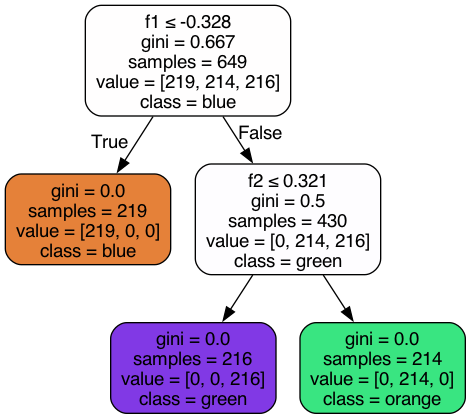

In [5]:
## PRUNE OUTLIERS
X_pruned = X[np.where(outlier_y_kmeans != 3)]
y_pruned = y_kmeans[np.where(outlier_y_kmeans != 3)]
X_train, X_test, y_train, y_test = train_test_split(X_pruned, y_pruned, shuffle=True, train_size=0.9, random_state=0)

dtree_pruned = DecisionTreeClassifier(random_state=0)
model = dtree_pruned.fit(X_train, y_train)
dot_data = export_graphviz(
    dtree_pruned,
    out_file='dtree_pruned.dot',
    feature_names=df.columns,
    class_names=["blue","orange","green"],
    filled=True,
    rounded=True,
    special_characters=True
)
y_pred = dtree_pruned.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f"ACC: {100*acc:.2f}%")

# Convert the DOT file to PNG
os.system("dot -Tpng dtree_pruned.dot > dtree_pruned.png")

# Display the decision tree
Image(filename = 'dtree_pruned.png')

As seen in the results, the model performance on the clustered targets was already perfect before pruning outliers, so there was no accuracy gain. However, as shown by the visualizations above, the resulting decision tree was much simpler after pruning than the decision tree trained on the outliers. By removing cluster outliers from the training data we prevent the decision tree from fitting to possible edge cases or erroneous data points. This can result in a much more interpretable model as shown here. 